In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

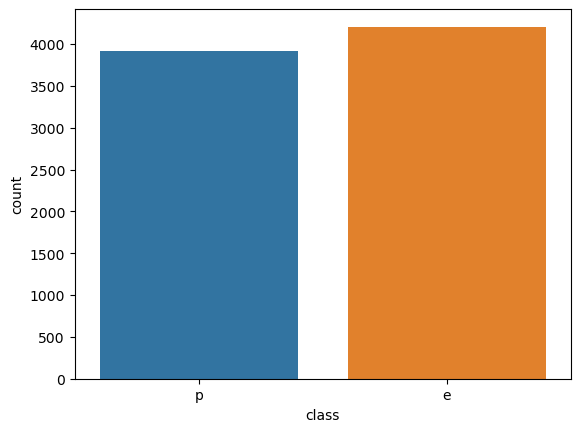

In [5]:
sns.countplot(data=df,x='class')
plt.show()

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###### X & y

In [9]:
X=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y=df['class']

##### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=101)

### Identifying best parameters for adaboost model using Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier

estimator_ab=AdaBoostClassifier()

param_grid_ab={'n_estimators':list(range(1,51))}

grid_ab=GridSearchCV(estimator_ab,param_grid_ab,scoring='accuracy',cv=5)
grid_ab.fit(X_train,y_train)
grid_ab.best_params_

{'n_estimators': 20}

In [12]:
grid_ab.best_estimator_.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [13]:
feats_ab=pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                  index=X.columns,columns=['Feature Importance'])
feats1=feats_ab[feats_ab['Feature Importance']>0]

list1=feats1.index.to_list()

#### Ada Boost Model Important Features

In [14]:
feats_ab=pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                  index=X.columns,columns=['Importance'])
feats_ab

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [15]:
imp_list=feats_ab[feats_ab['Importance']>0].index.to_list()
imp_list

['cap-color_w',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'spore-print-color_r',
 'spore-print-color_w',
 'population_c',
 'population_v']

In [16]:
X[imp_list]

,cap-color_w,bruises_t,odor_c,odor_f,odor_n,odor_p,gill-spacing_w,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_y,stalk-color-below-ring_n,spore-print-color_r,spore-print-color_w,population_c,population_v
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8120,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8121,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8122,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [17]:
important_features_ab=feats_ab[feats_ab['Importance']>0]

imp_features_list_ab=feats_ab[feats_ab['Importance']>0].index.to_list()

#### Adaboost Classifier with its important features & best hyperparameters

In [18]:
X_imp=X[imp_features_list_ab]

X_train_ab,X_test_ab,y_train_ab,y_test_ab = train_test_split(X_imp,y,train_size=0.8,
                                                 random_state=101)

ada=AdaBoostClassifier(n_estimators=20)
ada.fit(X_train_ab,y_train_ab)


#Prediction and Eval on Train
ypred_train = ada.predict(X_train_ab)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))


#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(ada,X_train_ab,y_train_ab,cv=5).mean())

#Predict and Eval on Test Data
ypred_test = ada.predict(X_test_ab)
print("Test Accuracy:",accuracy_score(ypred_test,y_test))


Train Accuracy: 1.0
CV Score: 1.0
Test Accuracy: 1.0


## Gradient Boost

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

estimator_gb=GradientBoostingClassifier()

param_grid_gb={'n_estimators':[1,5,10,20],'learning_rate':[0.1,0.2,0.3,
                                                           0.5,0.8,1]}

grid_gb=GridSearchCV(estimator_gb,param_grid_gb,scoring='accuracy',cv=5)
grid_gb.fit(X_train,y_train)
grid_gb.best_params_

{'learning_rate': 0.8, 'n_estimators': 10}

### Gradient Boost Model Important Features

In [25]:
feats_gb=pd.DataFrame(index=X.columns,
                      data=grid_gb.best_estimator_.feature_importances_,
                  columns=['Importance'])
important_features_gb=feats_gb[feats_gb['Importance']>0.01]

imp_features_list_gb=feats_gb[feats_gb['Importance']>0.01].index.to_list()
imp_features_list_gb

['bruises_t',
 'odor_m',
 'odor_n',
 'gill-spacing_w',
 'stalk-root_c',
 'stalk-surface-below-ring_y',
 'spore-print-color_r']

#### GB with important features & best hyperparameters

In [28]:
X_imp=X[imp_features_list_ab]

X_train_gb,X_test_gb,y_train_gb,y_test_gb = train_test_split(X_imp,y,train_size=0.8,
                                                 random_state=101)

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
gb.fit(X_train_gb,y_train_gb)


#Prediction and Eval on Train
ypred_train = gb.predict(X_train_gb)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train_gb,ypred_train))


#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(gb,X_train_gb,y_train_gb,cv=5).mean())

#Predict and Eval on Test Data
ypred_test = gb.predict(X_test_gb)
print("Test Accuracy:",accuracy_score(y_test_gb,ypred_test))


Train Accuracy: 1.0
CV Score: 0.9995384615384616
Test Accuracy: 1.0


### Xtreme Gradient Boost(XGB)

In [29]:
y=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=101)

In [43]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

estimator_xgb=XGBClassifier()

param_grid_xgb={'n_estimators':[10,20,40,100],
                'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

grid_xgb=GridSearchCV(estimator_xgb,param_grid_xgb,scoring='accuracy',cv=5)
grid_xgb.fit(X_train,y_train)
grid_xgb.best_params_

ModuleNotFoundError: No module named 'xgboost'

In [42]:
#Installing XGBOOST
pip install xgboost

SyntaxError: invalid syntax (3839027937.py, line 2)